In [52]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from numpy import where, mean
import numpy as np
from collections import Counter

In [49]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [50]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


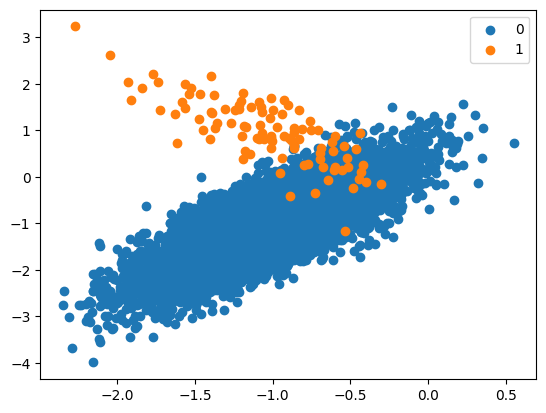

In [51]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [55]:
model = SVC(gamma='scale')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
roc_auc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
matrix = confusion_matrix(y_test, yhat)

tn, fp, fn, tp = matrix.ravel()
specificity = tn / (tn+fp)

print(matrix)

g_mean_scores = np.sqrt(specificity * mean(recall_scores))

[[3265    0]
 [  12   23]]


In [57]:
print('ROC AUC:{:.3f}'.format(mean(roc_auc_scores)))
print('Recall: {:.3f}'.format(mean(recall_scores)))
print('Precision: {:.3f}'.format(mean(precision_scores)))
print('Specificity: {:.3f}'.format(mean(specificity)))
print('G-mean: {:.3f}'.format(g_mean_scores))

ROC AUC:0.808
Recall: 0.670
Precision: 1.000
Specificity: 1.000
G-mean: 0.819


In [58]:
weights = {0:1, 1:10}
cost_model = SVC(gamma='scale', class_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cost_roc_auc_scores = cross_val_score(cost_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
cost_recall_scores = cross_val_score(cost_model, X, y, scoring='recall', cv=cv, n_jobs=-1)
cost_precision_scores = cross_val_score(cost_model, X, y, scoring='precision', cv=cv, n_jobs=-1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
cost_model.fit(X_train, y_train)
yhat = cost_model.predict(X_test)
cost_matrix = confusion_matrix(y_test, yhat)

tn, fp, fn, tp = cost_matrix.ravel()
cost_specificity = tn / (tn+fp)

print(cost_matrix)

cost_g_mean_scores = np.sqrt(specificity * mean(cost_recall_scores))

[[3260    5]
 [  10   25]]


In [60]:
print('Cost ROC AUC:{:.3f}'.format(mean(cost_roc_auc_scores)))
print('Cost Recall: {:.3f}'.format(mean(cost_recall_scores)))
print('Cost Precision: {:.3f}'.format(mean(cost_precision_scores)))
print('Cost Specificity: {:.3f}'.format(mean(cost_specificity)))
print('Cost G-mean: {:.3f}'.format(cost_g_mean_scores))

Cost ROC AUC:0.934
Cost Recall: 0.767
Cost Precision: 0.683
Cost Specificity: 0.998
Cost G-mean: 0.876
